In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = '../knowledgebase/labeled_sampled_queries.jsonl'

In [3]:
with open(file_path, 'r') as file:
    df = pd.read_json(file, lines = True)

In [4]:
df.sample(5)

,id,query,label
9826,d6be4ad9-df90-4202-8940-acd40e8fde8e,What kind of courses does FAU offer related to...,hybrid
11382,dfbcd028-faaf-4979-a8e6-99f76bd1544f,Can you tell me more about the module on Digit...,hybrid
2636,df24e2fd-66b3-432f-9fd4-08796f0107f2,I'm thinking of studying in Denmark and I came...,dense
446,590cfd11-28ea-4113-96b0-be15363a76b5,Can you tell me about the types of exams and a...,dense
4579,748ccf33-5e56-4516-b6c6-e45e5eda688b,What kind of international research opportunit...,hybrid


In [5]:
df_copy = df.copy()

In [6]:
df_copy.label.nunique()

6

In [7]:
df_copy.label.value_counts()

label
dense               7519
hybrid              3992
sparse                 8
dense.                 4
```\nhybrid\n```       2
**dense**              1
Name: count, dtype: int64

In [8]:
df_copy.label = df_copy.label.str.strip().str.replace('\n','')
df_copy.label = df_copy.label.str.rstrip('.')
df_copy.label = df_copy.label.str.lower()

In [9]:
df_copy.label.value_counts()

label
dense           7523
hybrid          3992
sparse             8
```hybrid```       2
**dense**          1
Name: count, dtype: int64

In [10]:
df_copy.label = df_copy.label.str.replace('**', '', regex = False)
df_copy.label = df_copy.label.str.replace('```', '', regex = False)

In [11]:
df_copy.label.value_counts()

label
dense     7524
hybrid    3994
sparse       8
Name: count, dtype: int64

In [12]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set_style("whitegrid")

In [15]:
label_counts = df_copy['label'].value_counts()
total_count = label_counts.sum()

labels_with_counts = [f'{label} ({count})' for label, count in label_counts.items()]

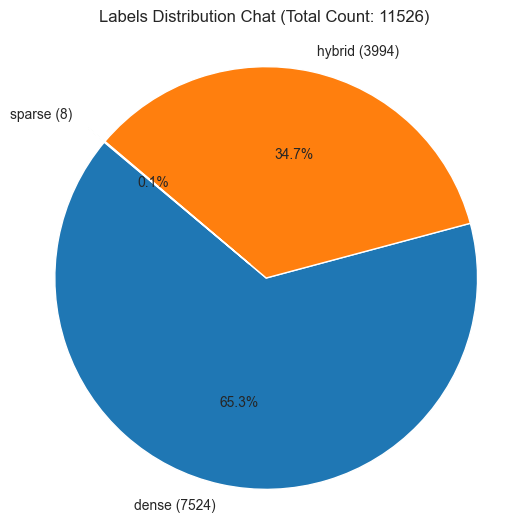

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(
    label_counts,
    labels=labels_with_counts,
    autopct='%1.1f%%',
    startangle=140,
    explode=(0, 0, 0.1)  # Emphasize the 'sparse' slice
)
plt.title(f'Labels Distribution Chat (Total Count: {total_count}) \n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()